# 🟦DataSet, DataLoader
- 파이토치의 기본 데이터타입은 `Tensor`객체 모든 데이터는 `Tensor` 로 생성시키는 과정 필요


- 파이토치에서는 데이터 준비를 위해 `torch.utils.data`의 `Dataset`과 `DataLoader` 사용 가능
  - `DataLoader`와 `Dataset`을 통해 `batch_size`, `train` 여부, `transform` 등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음

  - PyTorch 는 `DataLoader`를 사용하여 model 에 데이터 입력할수 있다  (물론 DataLoader 를 사용하지 않고도 가능하긴 하다)

# import

In [1]:
import matplotlib.pyplot as plt

import torch
from torch.utils.data import Dataset, DataLoader

# Dataset

**Dataset (`torch.utils.data.Dataset`)**
https://docs.pytorch.org/docs/stable/data.html#torch.utils.data.Dataset

기본적으로 An abstract class representing a Dataset


  * 학습에 사용할 **Dataset의 구조**를 정의하는 클래스.
  - **입력 데이터(X)** 와 **레이블(y)** 를 각각 Tensor로 만들고, 이를 (X, y) 쌍으로 관리할 수 있습니다.

  * `__getitem__` : 인덱스로 접근했을 때 어떤 데이터를 반환할지 정의 -> (입력, 출력) 쌍 .  인덱스로 접근가능케 해줌.  
  * `__len__` : 전체 데이터 크기를 알려줌.
  * 즉, 데이터셋을 “**파이썬의 리스트처럼**” 다룰 수 있도록 만들어줌.

In [2]:
# 입력 x에 2를 더한 값이 y가 되는 데이터셋을 준비해봅니다
# 👉 학습하고자 하는 함수: y = x + 2

x_train = torch.Tensor([1, 2, 3, 4, 5, 6]).view(6, 1)
y_train = torch.Tensor([3, 4, 5, 6, 7, 8]).view(6, 1)

print(x_train)
print(y_train)


tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.]])
tensor([[3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.]])


In [3]:
# Dataset 생성 (TensorDataset 사용)
from torch.utils.data import TensorDataset

In [4]:
dataset = TensorDataset(x_train, y_train)
dataset

In [5]:
len(dataset)   # __len__

6

In [6]:
dataset[0]  # __getitem__

# (tensor([1.]), tensor([3.]))
#     (X,           y)

(tensor([1.]), tensor([3.]))

In [7]:
# TensorDataset 로 Dataset 구현체다.
isinstance(dataset, Dataset)

True

# DataLoader

**DataLoader (`torch.utils.data.DataLoader`)**
https://docs.pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader

```python
class torch.utils.data.DataLoader(
  dataset,
  batch_size=1, # batch 하나로 묶을 데이터 개수
  shuffle=None, # 매 epoch 마다 데이터를 랜덤하게 섞어 학습하게 함.
  sampler=None,
  batch_sampler=None,
  num_workers=0, collate_fn=None, pin_memory=False, drop_last=False, timeout=0,
  worker_init_fn=None, multiprocessing_context=None, generator=None,
  *, prefetch_factor=None, persistent_workers=False, pin_memory_device='', in_order=True)
```





  * Dataset을 받아서 **배치(batch)** 단위로 잘라서 iteration 가능하도록 제공.
  * `batch_size` : 한 번에 꺼내올 데이터 개수.
  * `shuffle=True` : 매 epoch마다 데이터를 랜덤하게 섞어 학습하도록 함.
  * 내부적으로는 **iterator**처럼 동작 → `for batch in train_loader:` 형식으로 사용.
  * 모델 학습 루프에서 **자동으로 batch 단위 데이터 공급**.

In [8]:
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)
dataloader

In [9]:
len(dataloader)

# 2개의 batch   (dataset 은 6개 데이터 , batch_size=4  =>  4개, 2개)

2

In [21]:
# 첫번째 batch
next(iter(dataloader))
# shuffle=True 이기 때문에 iteration 할때 마다 매번 섞인다.

[tensor([[1.],
         [2.],
         [5.],
         [4.]]),
 tensor([[3.],
         [4.],
         [7.],
         [6.]])]

In [44]:
for batch in dataloader:
  X = batch[0]
  y = batch[1]
  print(X)
  print(y)
  print('🟨' * 10)

tensor([[2.],
        [4.],
        [5.],
        [1.]])
tensor([[4.],
        [6.],
        [7.],
        [3.]])
🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨
tensor([[3.],
        [6.]])
tensor([[5.],
        [8.]])
🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨


In [45]:
for X, y in dataloader:
  print(X)
  print(y)
  print('🟨' * 10)

tensor([[6.],
        [3.],
        [5.],
        [4.]])
tensor([[8.],
        [5.],
        [7.],
        [6.]])
🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨
tensor([[2.],
        [1.]])
tensor([[4.],
        [3.]])
🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨


In [46]:
for idx, (X, y) in enumerate(dataloader):
  print('batch', idx)
  print(X)
  print(y)
  print('🟨' * 10)

batch 0
tensor([[4.],
        [1.],
        [3.],
        [5.]])
tensor([[6.],
        [3.],
        [5.],
        [7.]])
🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨
batch 1
tensor([[6.],
        [2.]])
tensor([[8.],
        [4.]])
🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨


# Custom Dataset 사용

**DataSet 을 상속** 받아 CustomDataset 정의

* `__init__` : 데이터셋을 객체 내부에 저장.
* `__getitem__(index)` : `dataset[i]` 로 접근할 때 `(x_train[i], y_train[i])` 튜플을 반환.
* `__len__` : 전체 샘플 개수(6개)를 반환.

👉 따라서 `dataset[0]` → `(tensor([1.]), tensor([3.]))` 같은 형태.

In [47]:
class CustomDataset(Dataset):

  # 입력데이터, 정답(레이블) 저장
  def __init__(self, x_train, y_train):
    self.x_train = x_train
    self.y_train = y_train

  # index 에 해당하는 아이템 리턴 -> (입력데이터, 타켓) tuple
  def __getitem__(self, index):
    return self.x_train[index], self.y_train[index]

  # 데이터 사이즈 리턴
  def __len__(self):
    return self.x_train.shape[0]

In [48]:
print(x_train)
print(y_train)

tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.]])
tensor([[3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.]])


In [49]:
dataset = CustomDataset(x_train, y_train)

In [50]:
len(dataset)

6

In [51]:
dataset[0]

(tensor([1.]), tensor([3.]))

In [53]:
train_loader = DataLoader(dataset, batch_size=3, shuffle=True)
# batch_size=3 → 한 번에 3개 샘플 묶어서 반환.
# shuffle=True → 매 epoch마다 데이터를 섞음.
# 👉 즉, 6개 데이터 → (3개씩) 2개의 배치로 나누어 학습.

In [54]:
len(train_loader)

2

In [55]:
for idx, (X, y) in enumerate(train_loader):
  print('batch', idx)
  print(X)
  print(y)
  print('🟨' * 10)

batch 0
tensor([[4.],
        [2.],
        [6.]])
tensor([[6.],
        [4.],
        [8.]])
🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨
batch 1
tensor([[3.],
        [5.],
        [1.]])
tensor([[5.],
        [7.],
        [3.]])
🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨


# 파이토치 제공 데이터셋
파이토치 자체는 torch.utils.data.Dataset 과 DataLoader 를 기본 뼈대로 제공하고,

실제 많이 쓰이는 데이터셋은 별도 라이브러리에서 제공됩니다.

대표적으로는 torchvision, torchtext, torchaudio 등이 있고, 최근에는 torchdata 라는 범용 데이터 파이프라인 라이브러리도 있다

  - TorchVision Dataset: https://pytorch.org/vision/stable/datasets.html
    - 이미지/비전 관련 데이터셋, 모델, 변환(transforms)을 제공.
    - 주로 이미지 분류, 객체 탐지, 세그멘테이션 등에서 사용.
    - 대표데이터셋:
      - MNIST: 손글씨 숫자
      - CIFAR-10 / CIFAR-100: 작은 크기의 컬러 이미지 (10개/100개 클래스)
      - FashionMNIST: 의류 이미지
      - ImageNet: 대규모 이미지 분류
      - COCO: 객체 탐지·세그멘테이션
      - VOC: 객체 탐지·세그멘테이션
      - CelebA: 얼굴 이미지    
  
  - TorchText Dataset: https://pytorch.org/text/stable/datasets.html
    - 자연어 처리용
    - 텍스트 전처리, 임베딩, 데이터셋을 제공.
    - 최근 버전에서는 HuggingFace의 Datasets와 결합해서 쓰는 경우도 많다
    - 대표데이터셋:
      - AG_NEWS: 뉴스 기사 분류
      - IMDB: 영화 리뷰 감정 분류
      - SST-2 (Stanford Sentiment Treebank): 감정 분류
      - WikiText2, WikiText103: 언어 모델링
      - Multi30k: 번역 데이터셋 (EN ↔ DE)
      - Penn Treebank (PTB): 언어 모델링    

  - TorchAudio Dataset: https://pytorch.org/audio/stable/datasets.html
    - 음성용
    - 음성 신호 처리, 변환(transform), 데이터셋 제공
    - 대표 데이터셋:
      - LibriSpeech: 음성 인식용
      - TEDLIUM: TED 강연 음성 데이터
      - YesNo: 간단한 yes/no 발화 데이터
      - CommonVoice: Mozilla에서 공개한 대규모 다국어 음성 데이터

  - torchdata
    - 범용 데이터 파이프라인
    -  최근에 추가된 라이브러리로, 대규모 데이터셋을 효율적으로 스트리밍/전처리할 수 있도록 지원.
    - HuggingFace Datasets 처럼 범용적이지만, PyTorch 스타일에 맞게 최적화되어 있습니다.    
    - 예시
      - 웹에서 직접 데이터 다운로드 및 스트리밍
      - DataPipe 를 이용해 변환 체인 구성

# MNIST 데이터 셋

## MNIST 소개

![](https://velog.velcdn.com/images/yelim421/post/1fb57c0f-90b1-4622-832f-fb1690fc1bba/image.png)

**MNIST (Modified National Institute of Standards and Technology dataset)** 는 머신러닝과 딥러닝에서 가장 널리 사용되는 기초 이미지 데이터셋 중 하나입니다.

---

### 📌 주요 특징

* **데이터 종류**: 손으로 쓴 숫자(0~9) 흑백 이미지
* **이미지 크기**: 28 x 28 픽셀 (총 784차원 벡터로 변환 가능)
* **채널 수**: 1 (Grayscale, 흑백)
* **학습용 데이터**: 60,000장
* **테스트용 데이터**: 10,000장
* **라벨**: 각 이미지가 나타내는 숫자 (0~9, 총 10개 클래스)


In [56]:
from torchvision import datasets
import torchvision.transforms as transforms

In [57]:
dataset = datasets.MNIST(
    root='.',  # 저장할 경로.
    download=True,   # 다운로드 받은게 없으면 다운로드.
)

100%|██████████| 9.91M/9.91M [00:00<00:00, 17.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 483kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.48MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.10MB/s]


In [58]:
import os
os.listdir('./MNIST/raw')

['t10k-images-idx3-ubyte.gz',
 'train-images-idx3-ubyte',
 't10k-images-idx3-ubyte',
 't10k-labels-idx1-ubyte.gz',
 'train-labels-idx1-ubyte',
 'train-images-idx3-ubyte.gz',
 't10k-labels-idx1-ubyte',
 'train-labels-idx1-ubyte.gz']

In [59]:
# 읽어들인 MNIST 데이터를 파이토치에서 제공하는 Dataset 형태로 리턴해준다.
isinstance(dataset, Dataset)

True

In [60]:
len(dataset)  # 기본적으로 훈련(train) 용 데이터만 가져온다.

60000

In [62]:
dataset[0]  # 28x28 PIL.Image

(<PIL.Image.Image image mode=L size=28x28>, 5)

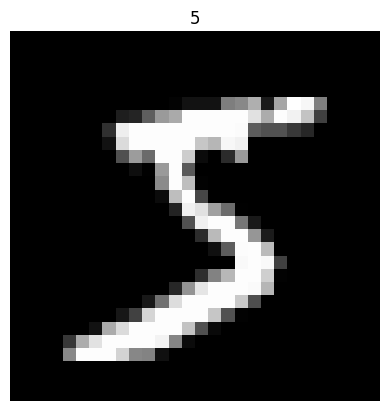

In [69]:
# 첫 데이터 시각화
from PIL import Image
plt.imshow(dataset[0][0], cmap='gray') # Image 데이터
plt.title(dataset[0][1])  # label
plt.axis('off')
plt.show()

## transform 정의
- `DataLoader`의 인자로 들어갈 `transform`을 미리 정의할 수 있고, `Compose`를 통해 리스트 안에 순서대로 전처리 진행

- `ToTensor`()를 하는 이유는 `torchvision`이 PIL Image 형태로만 입력을 받기 때문에 데이터 처리를 위해서 Tensor형으로 변환 필요

  1. 자료형 변환

    - 입력: PIL.Image 또는 NumPy ndarray (dtype=uint8, 0~255)

    - 출력: torch.FloatTensor (dtype=float32)

  1. 차원 순서 변경

    - 일반 이미지: (높이, 너비, 채널) → PyTorch 텐서: (채널, 높이, 너비)

    - 예: (H=224, W=224, C=3) → (C=3, H=224, W=224)

  1. 값 범위 스케일링

    - 0 ~ 255 정수 값 → 0 ~ 1 실수 값

    - 즉, pixel_value / 255.0

In [70]:
# transform 정의
mnist_transform = transforms.Compose([
    transforms.ToTensor(),   # [0, 255] -> [0, 1] 실수값으로 변환
    transforms.Normalize(mean=(0.5,), std=(1.0,)),  # 전처리, 정규화
])

### 설명)transform 과정

1. **`ToTensor()`**

   * MNIST 이미지는 원래 `uint8` 타입의 0~255 범위 픽셀 값.
   * `ToTensor()`는 이를 `float32`로 바꾸고 `[0, 1]` 범위로 **스케일링**합니다.

   예: `128 → 128/255 ≈ 0.502`

2. **`Normalize(mean=(0.5,), std=(1.0,))`**

   * 정규화는 다음 공식으로 수행됩니다:

     $$
     x_{norm} = \frac{x - \text{mean}}{\text{std}}
     $$
   * 여기서는 `mean=0.5`, `std=1.0`이므로 단순히 **0.5를 빼는 역할**만 합니다.

   즉,

   $$
   x_{norm} = x - 0.5
   $$

   따라서 결과 값의 범위는:

   $$
   [0,1] \;→\; [-0.5, +0.5]
   $$

### 결과 요약

* 원래 MNIST 픽셀 값 `[0,255]`
* → `ToTensor()` 후 `[0,1]`
* → `Normalize(0.5, 1.0)` 후 `[-0.5, +0.5]`

즉, MNIST 데이터가 원본데이터 **0.5를 기준으로 중앙정렬(centered)된 값**으로 변환됩니다.

---

👉 만약 `std=(0.5,)`를 썼다면 값은 `[-1, +1]` 범위로 스케일링됩니다.

### 왜 [-1, 1]로 맞추는가?

* **대칭적인 분포**: 평균이 0에 가까워져서 신경망(특히 `tanh`, `ReLU` 류 활성화 함수)이 학습하기 쉬워짐
* **빠른 수렴**: 가중치 초기화와 잘 어울려 학습 속도가 빨라짐
* **실무적 편의**: 많은 pretrained 모델(CNN 등)이 이미 [-1,1] 구간을 가정하고 학습되어 있음


## train, test 데이터셋

In [71]:
trainset = datasets.MNIST(
    root='.',
    train=True,   # 학습용 세트
    download=True,
    transform=mnist_transform,  # 전처리
)

testset = datasets.MNIST(
    root='.',
    train=False,   # 테스트 세트
    download=True,
    transform=mnist_transform,  # 전처리
)

len(trainset), len(testset)

(60000, 10000)

In [73]:
# .data  <- Tensor 객체
# .targets <- Tensor 객체

trainset.data.shape, trainset.targets.shape

(torch.Size([60000, 28, 28]), torch.Size([60000]))

In [74]:
dataset.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [75]:
trainset.data.max(), trainset.data.min()  # transform 적용전.

(tensor(255, dtype=torch.uint8), tensor(0, dtype=torch.uint8))

In [76]:
trainset.data[0]  # 첫번째 데이터

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [78]:
trainset.targets.max(), trainset.targets.min()

(tensor(9), tensor(0))

In [79]:
# 레이블명 확인
trainset.classes, testset.classes

(['0 - zero',
  '1 - one',
  '2 - two',
  '3 - three',
  '4 - four',
  '5 - five',
  '6 - six',
  '7 - seven',
  '8 - eight',
  '9 - nine'],
 ['0 - zero',
  '1 - one',
  '2 - two',
  '3 - three',
  '4 - four',
  '5 - five',
  '6 - six',
  '7 - seven',
  '8 - eight',
  '9 - nine'])

In [80]:
datasets.MNIST.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## DataLoader

In [81]:
train_loader = DataLoader(
    dataset = trainset,  # Dataset 객체
    batch_size = 32,   # 배치 크기
    shuffle = True,
    num_workers=2,   # 데이터 로딩에 사용할 subprocess 개수 <- 병렬로 동작.
)

test_loader = DataLoader(
    dataset = testset,
    batch_size = 32,
    # test셋은 shuffle 할 필요 없다.
    shuffle = False,  # (일반적으로) 학습시 True, 테스트는 False
)

## 데이터 확인

In [82]:
len(train_loader), len(test_loader)

(1875, 313)

In [ ]:
# batch 의 개수
# 60000 /32 = 1875
# 10000 /32 = 313

In [83]:
# 첫번째 batch
images, labels = next(iter(train_loader))

images.shape, labels.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [ ]:
# torch.Size([32, 1, 28, 28]
# [batch size, channel, height, width]

#

In [84]:
# 첫번째 image
image = images[0]
image.shape

torch.Size([1, 28, 28])

In [85]:
image  # DataLoader 생성되면서 transform 된 결과!

tensor([[[-0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000],
         [-0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000],
         [-0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000],
         [-0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, -0.5000, -0

In [86]:
image.min(), image.max()

(tensor(-0.5000), tensor(0.5000))

In [87]:
# 시각화 를 위해 채널차원 (size 1) 제거
torch_image = torch.squeeze(image)
torch_image.shape

torch.Size([28, 28])

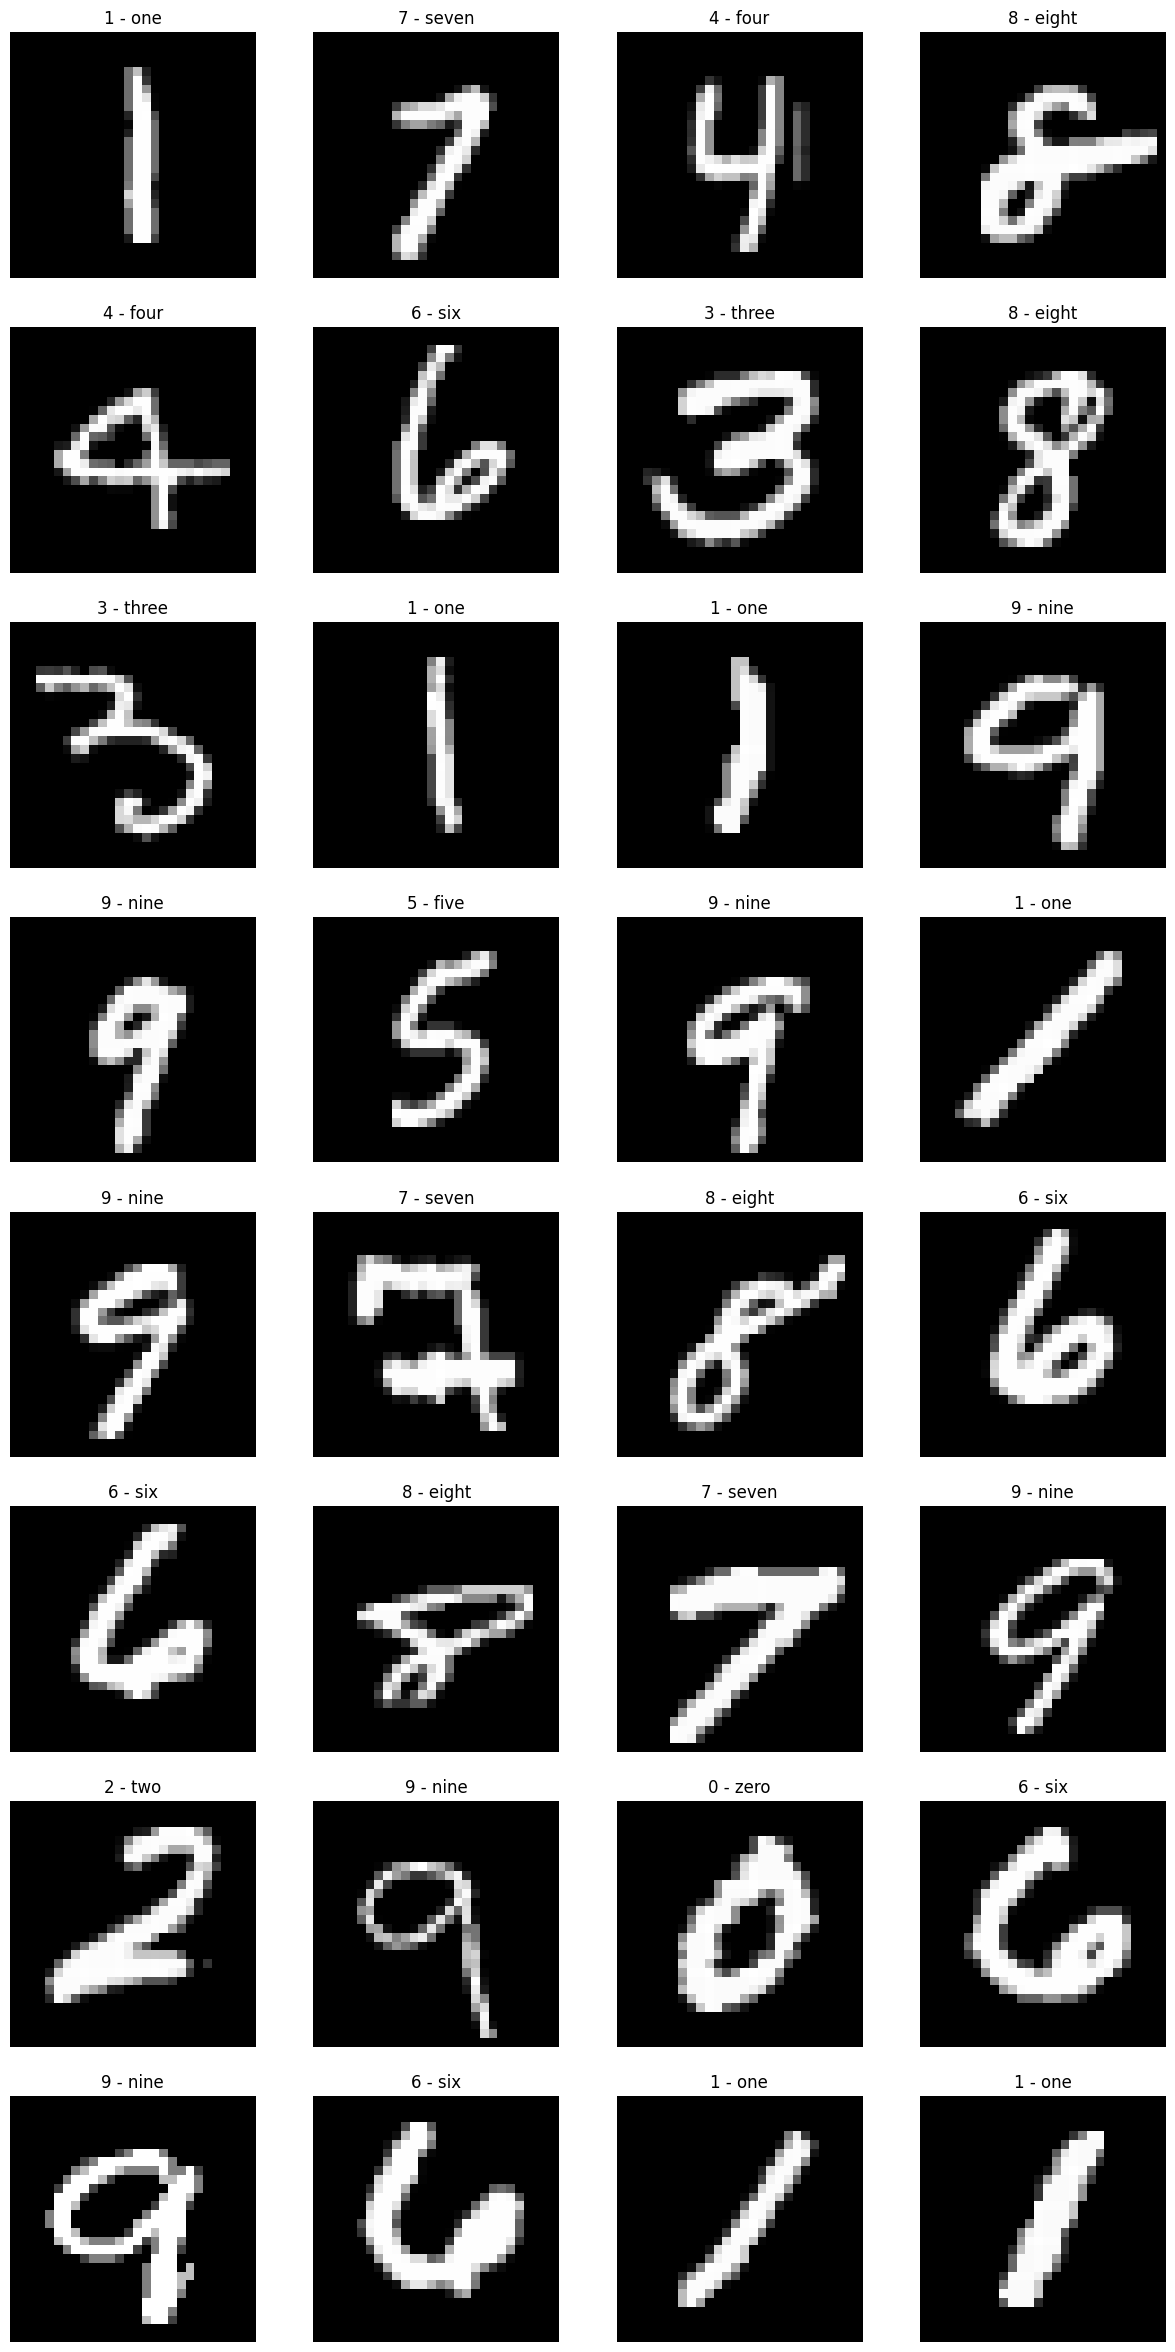

In [88]:
# 시각화

figure = plt.figure(figsize=(15, 30))

cols, rows = 4, 8

for i in range(cols * rows):
  img = images[i]
  label = datasets.MNIST.classes[labels[i]]
  figure.add_subplot(rows, cols, i + 1)
  plt.title(label)
  plt.axis('off')
  plt.imshow(img.squeeze(), cmap='gray')


plt.show()

